In [100]:
import yfinance as yf

In [101]:
ETH_ticker=yf.Ticker("ETH-USD")

In [102]:
ETH=ETH_ticker.history(period="max")
ETH

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00+00:00,3174.051025,3285.760986,3172.777100,3275.951416,15993893521,0.0,0.0
2024-07-27 00:00:00+00:00,3275.891602,3327.426514,3195.356689,3247.607910,15198233287,0.0,0.0
2024-07-28 00:00:00+00:00,3247.507324,3283.152100,3201.763184,3271.464600,8959236446,0.0,0.0


In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [104]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2456 entries, 2017-11-09 00:00:00+00:00 to 2024-07-31 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2456 non-null   float64
 1   High          2456 non-null   float64
 2   Low           2456 non-null   float64
 3   Close         2456 non-null   float64
 4   Volume        2456 non-null   int64  
 5   Dividends     2456 non-null   float64
 6   Stock Splits  2456 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 153.5 KB


In [105]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

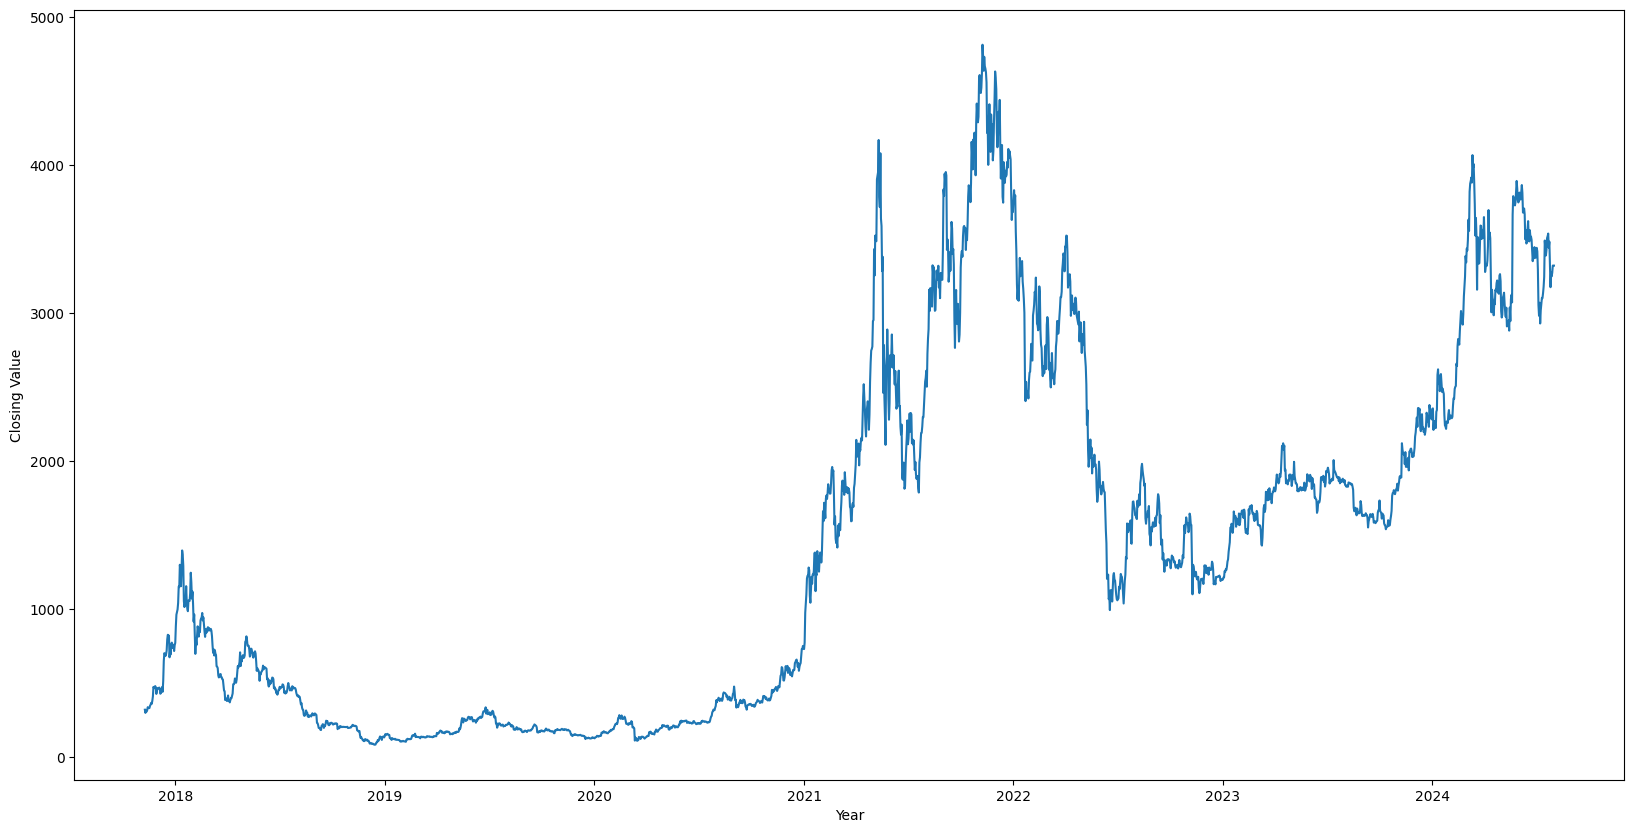

In [106]:
ETH=ETH['Close'].copy()
plt.figure(figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Closing Value")
plt.plot(ETH)

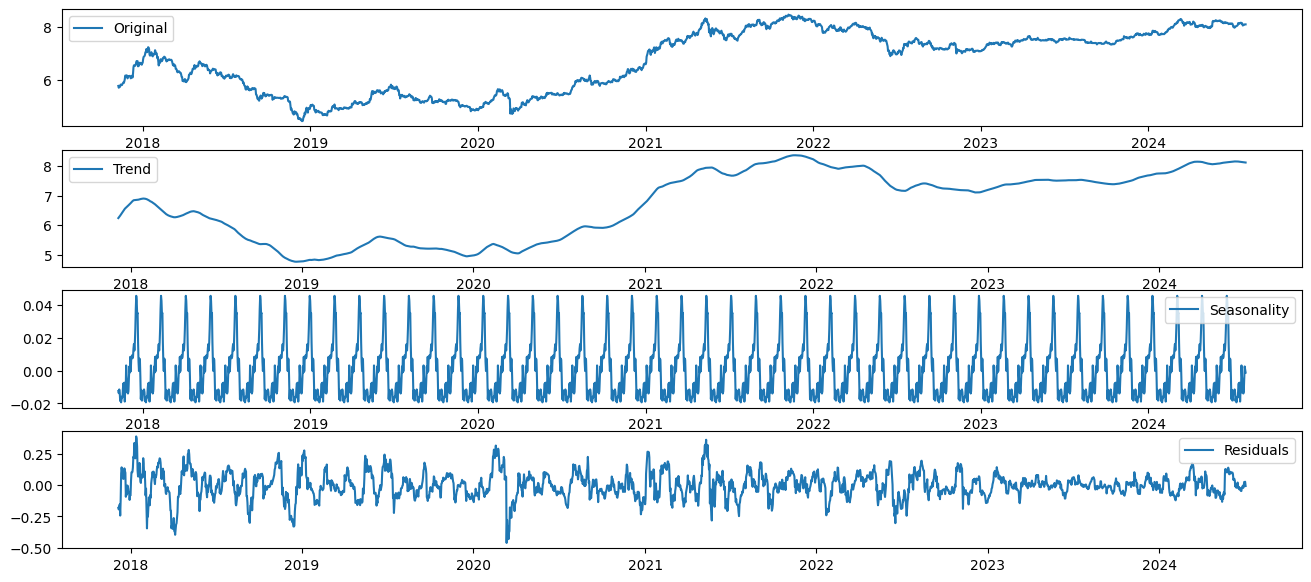

In [107]:
ETH=np.log(ETH)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ETH,period=54)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ETH, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

train = ETH.iloc[:len(ETH)-365]
test = ETH.iloc[len(ETH)-365:]

In [108]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(train, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            -1.034104
p-value                    0.740624
Lags Used                  6.000000
No. of Obs              2084.000000
Critical Value (1%)       -3.433492
Critical Value (5%)       -2.862928
Critical Value (10%)      -2.567509
dtype: float64


In [109]:
from statsmodels.graphics.tsaplots import plot_acf

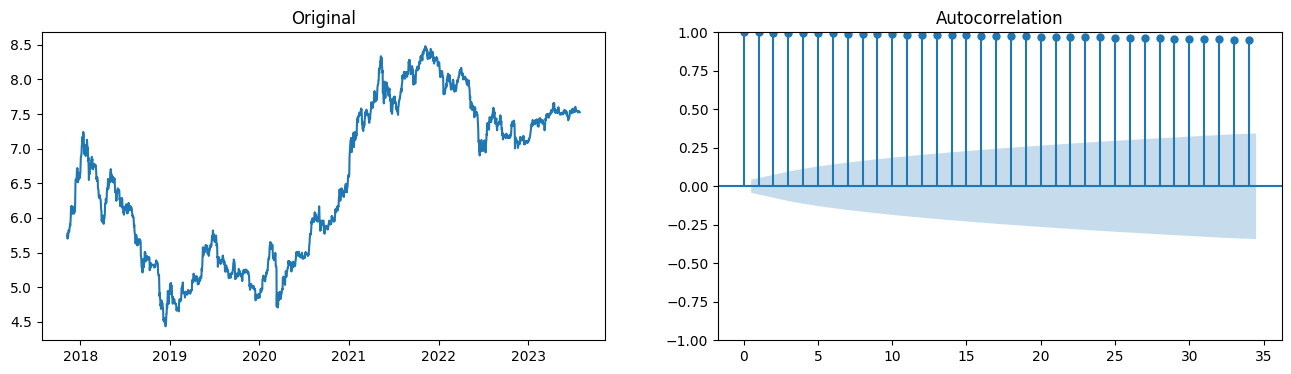

In [110]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(train)
ax1.set_title("Original")
plot_acf(train,ax=ax2);

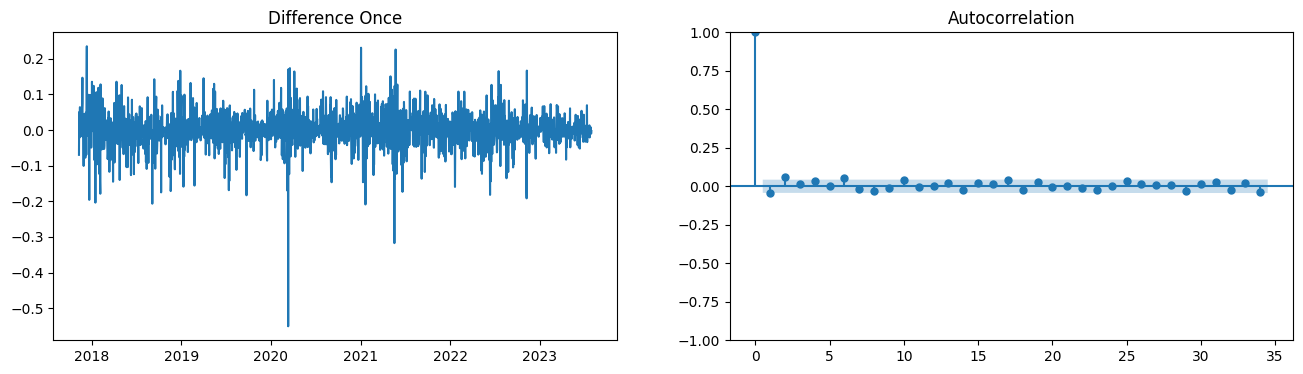

In [111]:
diff=train.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff,ax=ax2);

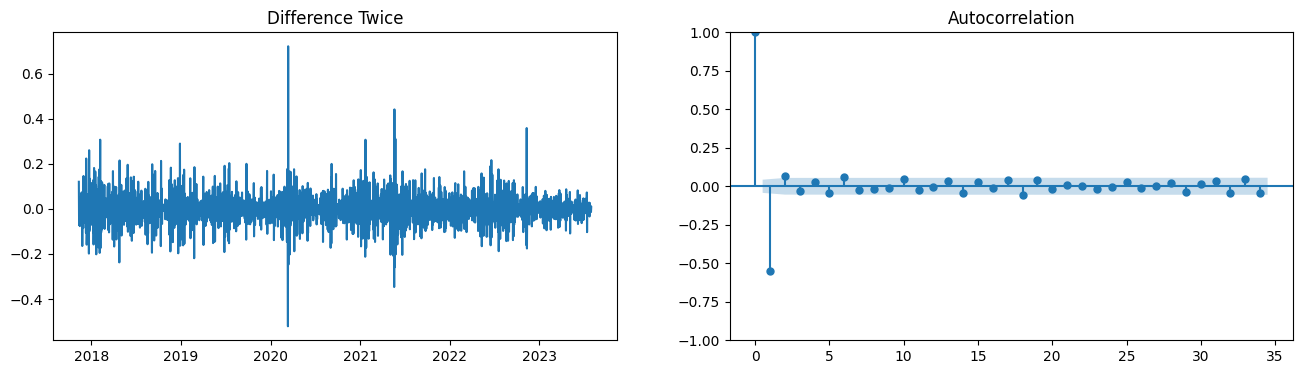

In [112]:
diff=train.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Twice")
plot_acf(diff,ax=ax2);

In [113]:
from statsmodels.graphics.tsaplots import plot_pacf

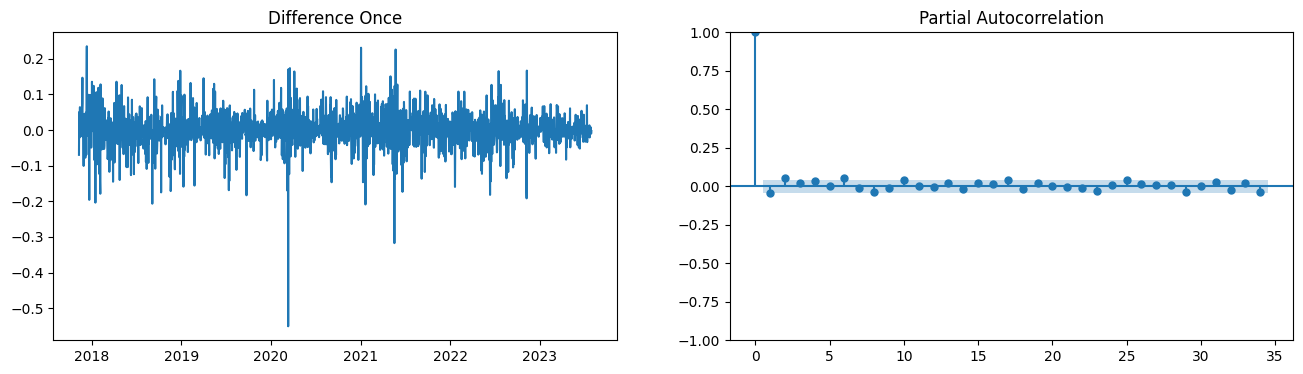

In [114]:
diff=train.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

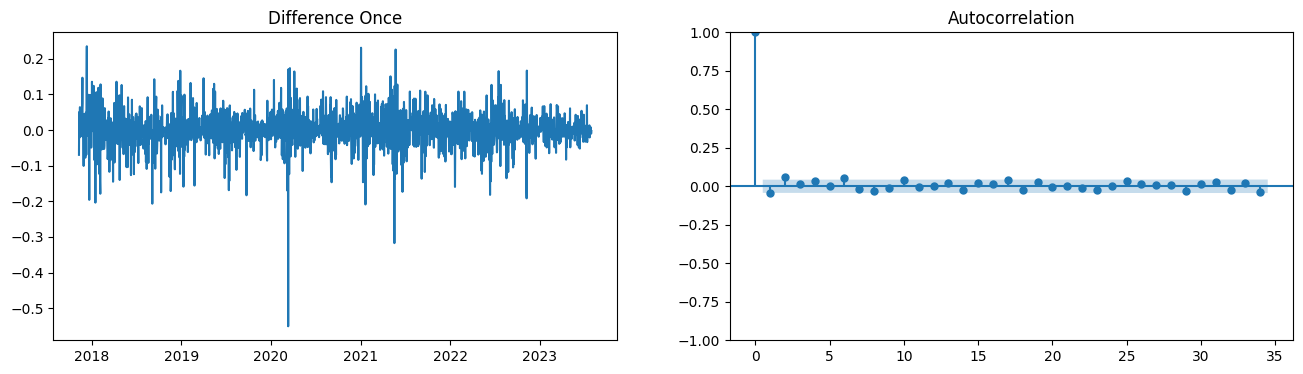

In [115]:
diff=train.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [116]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [117]:
stepwise_fit=auto_arima(train,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6644.964, Time=15.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6640.711, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6642.690, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6642.275, Time=1.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6642.106, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6646.545, Time=1.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6647.336, Time=4.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-6645.844, Time=1.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6643.101, Time=0.93 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-6643.778, Time=2.39 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6648.738, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6643.617, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6648.012, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-6647.249, Time=0.32 sec
 ARIMA(1,1,1)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2091
Model:               SARIMAX(0, 1, 2)   Log Likelihood                3327.369
Date:                Wed, 31 Jul 2024   AIC                          -6648.738
Time:                        13:06:11   BIC                          -6631.804
Sample:                    11-09-2017   HQIC                         -6642.534
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0420      0.016     -2.677      0.007      -0.073      -0.011
ma.L2          0.0556      0.019      2.895      0.004       0.018       0.093
sigma2         0.0024   3.04e-05     79.841      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9819.05
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
from statsmodels.tsa.arima.model import ARIMA

In [119]:
model=ARIMA(train, order=(0,1,2))
results=model.fit()

In [120]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2091
Model:                 ARIMA(0, 1, 2)   Log Likelihood                3327.369
Date:                Wed, 31 Jul 2024   AIC                          -6648.738
Time:                        13:06:12   BIC                          -6631.804
Sample:                    11-09-2017   HQIC                         -6642.534
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0420      0.016     -2.677      0.007      -0.073      -0.011
ma.L2          0.0556      0.019      2.895      0.004       0.018       0.093
sigma2         0.0024   3.04e-05     79.841      0.0

In [121]:
residuals=pd.DataFrame(results.resid)

(array([1.50583075e+00, 7.48755623e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.56318811e-04]),
 array([-0.55218068,  0.08014536,  0.7124714 ,  1.34479744,  1.97712347,
         2.60944951,  3.24177555,  3.87410158,  4.50642762,  5.13875366,
         5.7710797 ]),
 <BarContainer object of 10 artists>)

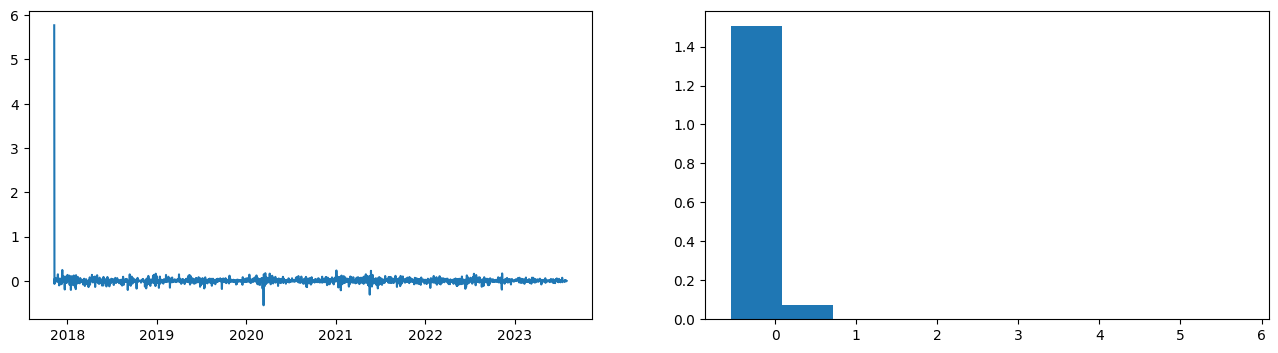

In [122]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

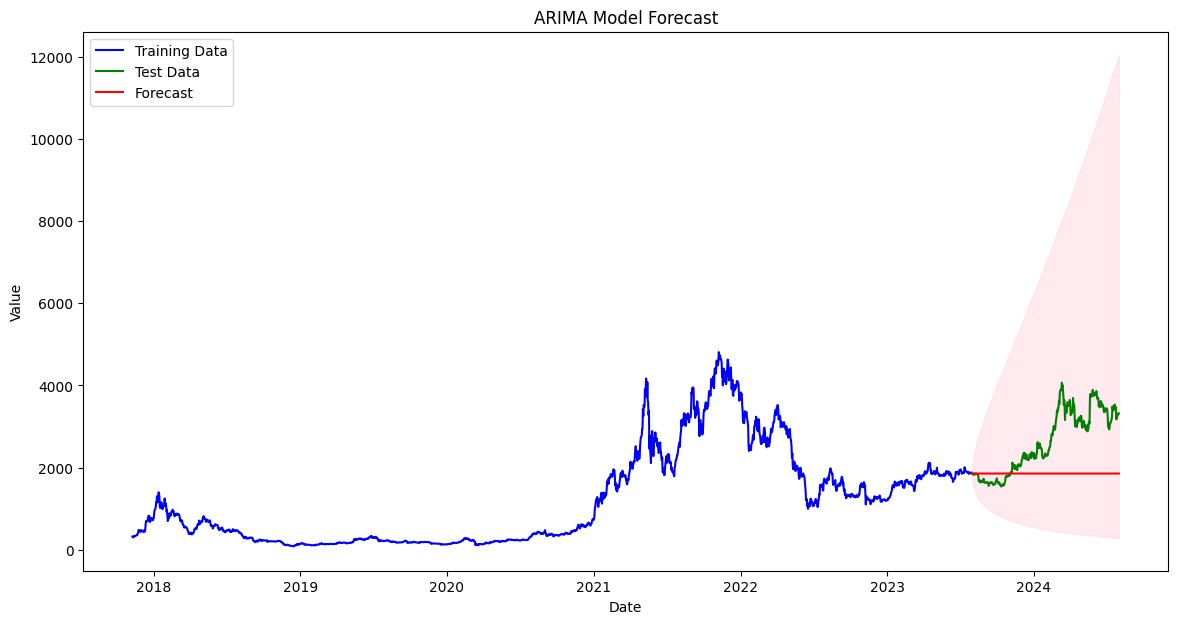

In [123]:
forecast = results.get_forecast(steps=len(test))
forecast_index = test.index
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
# Plotting
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train.index, np.exp(train), label='Training Data', color='blue')

# Plot test data
plt.plot(test.index, np.exp(test), label='Test Data', color='green')

# Plot forecasts
plt.plot(test.index, np.exp(forecast_mean), label='Forecast', color='red')
plt.fill_between(forecast_index, np.exp(forecast_conf_int.iloc[:, 0]), np.exp(forecast_conf_int.iloc[:, 1]), color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [124]:
from statsmodels.tools.eval_measures import rmse
print("Root Mean Squared Error between actual and  predicted values: ",rmse(forecast_mean,test))
print("Mean Value of Test Dataset:", test.mean())

Root Mean Squared Error between actual and  predicted values:  0.4247634518320222
Mean Value of Test Dataset: 7.825698303629346


In [125]:
from sklearn.metrics import r2_score

r2 = r2_score(test, forecast_mean)
print("R-squared:", r2)

R-squared: -0.99625108756542


In [126]:
train = ETH.iloc[len(ETH)-365:len(ETH)-100]
test = ETH.iloc[len(ETH)-100:]

In [127]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(train, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -0.508312
p-value                   0.890384
Lags Used                 3.000000
No. of Obs              261.000000
Critical Value (1%)      -3.455656
Critical Value (5%)      -2.872678
Critical Value (10%)     -2.572705
dtype: float64


In [128]:
stepwise_fit=auto_arima(train,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1132.387, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1135.553, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1135.454, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1135.604, Time=8.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1136.248, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1133.638, Time=1.96 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 12.072 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  265
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 569.124
Date:                Wed, 31 Jul 2024   AIC                          -1136.248
Time:                        13:06:26   BIC                          -1132.672
Sample:                    08-01-2023   HQIC                         -1134.811
                         - 04-21-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0008   4.45e-05     17.654      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.92   Jarque-Bera (JB):                81.55
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               3.55   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
model=ARIMA(train, order=(0,1,0))
results=model.fit()

In [130]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  265
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 569.124
Date:                Wed, 31 Jul 2024   AIC                          -1136.248
Time:                        13:06:27   BIC                          -1132.672
Sample:                    08-01-2023   HQIC                         -1134.811
                         - 04-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0008   4.45e-05     17.654      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.92   Jarque-Bera (JB):                81.55
Prob(Q):                              0.17   Pr

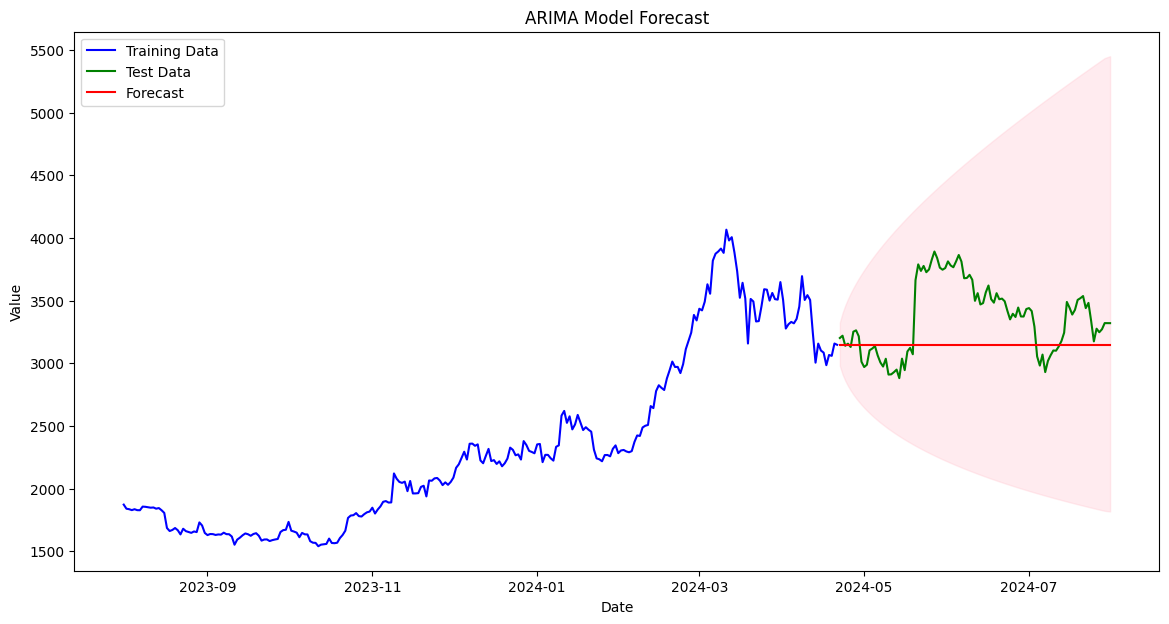

In [131]:
forecast = results.get_forecast(steps=len(test))
forecast_index = test.index
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
# Plotting
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train.index, np.exp(train), label='Training Data', color='blue')

# Plot test data
plt.plot(test.index, np.exp(test), label='Test Data', color='green')

# Plot forecasts
plt.plot(test.index, np.exp(forecast_mean), label='Forecast', color='red')
plt.fill_between(forecast_index, np.exp(forecast_conf_int.iloc[:, 0]), np.exp(forecast_conf_int.iloc[:, 1]), color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [132]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(forecast_mean,test))
print("Mean Value of Test Dataset:", test.mean())
r2 = r2_score(test, forecast_mean)
print("R-squared:", r2)

Root Mean Squared Error between actual and  predicted values:  0.10487804648882852
Mean Value of Test Dataset: 8.117129933421477
R-squared: -0.5598948444059668
